importation des librairies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;

lecture du dataset

In [2]:
file_path = '../data/concat-csv.csv'
lacentral_df = pd.read_csv(file_path, sep=';')
lacentral_df.shape

(1312, 26)

In [3]:
lacentral_df.head()

,price,model,energy,gear_box,kilometers,year,zip_code,cylinder,horsepower,origin,...,doors,seats,length,trunkVolumeRange,ratedHorsePower,pollutionNorm,critAir,co2,picture,page
0,12 480 €,CITROEN C3 III,Essence,Manuelle,128 750 km,2020,01 ‌,1.2,68.0,France,...,5.0,2.0,4 m,Grand coffre,4 CV,EURO6,1,A,https://image-annonce.lacentrale.fr/480x369/E1...,1
1,57 660 €,BMW X5 G05,Diesel,Automatique,140 501 km,2020,01 ‌,3.0,265.0,France,...,5.0,7.0,"4,92 m",Moyen Coffre,16 CV,EURO6,2,D,https://image-annonce.lacentrale.fr/480x369/E1...,1
2,68 900 €,BMW X6 F16,Diesel,Automatique,66 045 km,2019,45 ‌,3.0,313.0,France,...,5.0,5.0,"4,91 m",Moyen Coffre,20 CV,EURO6,2,E,https://image-annonce.lacentrale.fr/480x369/E1...,1
3,81 730 €,AUDI Q8,Diesel,Automatique,29 430 km,2020,76 ‌,3.0,231.0,France,...,5.0,5.0,"4,99 m",Moyen Coffre,14 CV,EURO6,2,E,https://image-annonce.lacentrale.fr/480x369/E1...,1
4,35 060 €,TOYOTA YARIS CROSS,Hybrides,Automatique,18 km,2024,27 ‌,1.5,116.0,France,...,5.0,5.0,"4,18 m",Petit coffre,5 CV,EURO6,1,B,https://image-annonce.lacentrale.fr/480x369/E1...,1


In [4]:
lacentral_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312 entries, 0 to 1311
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 1312 non-null   object 
 1   model                 1312 non-null   object 
 2   energy                1300 non-null   object 
 3   gear_box              1312 non-null   object 
 4   kilometers            1312 non-null   object 
 5   year                  1312 non-null   int64  
 6   zip_code              1312 non-null   object 
 7   cylinder              1312 non-null   float64
 8   horsepower            1312 non-null   float64
 9   origin                1312 non-null   object 
 10  firstCirculationDate  1312 non-null   object 
 11  technicalControl      1312 non-null   object 
 12  firstHand             1312 non-null   object 
 13  owners                307 non-null    float64
 14  externalColor         1312 non-null   object 
 15  internalColor        

In [5]:
print(f"nombre de colonnes: {lacentral_df.shape[1]}")
lacentral_df.columns

nombre de colonnes: 26


Index(['price', 'model', 'energy', 'gear_box', 'kilometers', 'year',
       'zip_code', 'cylinder', 'horsepower', 'origin', 'firstCirculationDate',
       'technicalControl', 'firstHand', 'owners', 'externalColor',
       'internalColor', 'doors', 'seats', 'length', 'trunkVolumeRange',
       'ratedHorsePower', 'pollutionNorm', 'critAir', 'co2', 'picture',
       'page'],
      dtype='object')

In [6]:
if lacentral_df.isnull().any().any():
    print("There are null values in the DataFrame")
else:
    print("There are no null values in the DataFrame")

There are null values in the DataFrame


In [7]:
lacentral_df.isna().sum()

price                      0
model                      0
energy                    12
gear_box                   0
kilometers                 0
year                       0
zip_code                   0
cylinder                   0
horsepower                 0
origin                     0
firstCirculationDate       0
technicalControl           0
firstHand                  0
owners                  1005
externalColor              0
internalColor            890
doors                      2
seats                     29
length                    32
trunkVolumeRange         111
ratedHorsePower            0
pollutionNorm             29
critAir                    4
co2                       64
picture                    0
page                       0
dtype: int64

In [8]:
lacentral_df['owners'] = lacentral_df['owners'].fillna(0)
lacentral_df['internalColor'] = lacentral_df['internalColor'].fillna(0)
lacentral_df.dropna(inplace=True)
print(lacentral_df.shape)
lacentral_df.isna().sum()

(1133, 26)


price                   0
model                   0
energy                  0
gear_box                0
kilometers              0
year                    0
zip_code                0
cylinder                0
horsepower              0
origin                  0
firstCirculationDate    0
technicalControl        0
firstHand               0
owners                  0
externalColor           0
internalColor           0
doors                   0
seats                   0
length                  0
trunkVolumeRange        0
ratedHorsePower         0
pollutionNorm           0
critAir                 0
co2                     0
picture                 0
page                    0
dtype: int64

In [9]:
if lacentral_df.isnull().any().any():
    print("There are null values in the DataFrame")
else:
    print("There are no null values in the DataFrame")

There are no null values in the DataFrame


In [10]:
num_duplicates = lacentral_df.duplicated().sum()
print(f"Number of duplicated rows: {num_duplicates}")

Number of duplicated rows: 0


In [11]:
duplicated_rows = lacentral_df[lacentral_df.duplicated()]
lacentral_df.drop_duplicates(inplace=True)
lacentral_df.shape

(1133, 26)

1266 modèles de voiture

In [12]:
lacentral_df['model'].value_counts().reset_index()

,model,count
0,PEUGEOT 208 II,32
1,PEUGEOT 2008 II,29
2,CITROEN C3 III phase 2,23
3,RENAULT CLIO V,22
4,CITROEN C3 III,21
...,...,...
362,SEAT LEON IV ST,1
363,AUDI A5 SPORTBACK II,1
364,AUDI A3 III phase 2,1
365,DACIA JOGGER,1


62 marques

In [13]:
lacentral_df['brand'] = lacentral_df['model'].str.strip().str.split().str[0]
lacentral_df['brand'].value_counts().reset_index()

,brand,count
0,PEUGEOT,191
1,CITROEN,138
2,RENAULT,116
3,MERCEDES,90
4,AUDI,88
5,BMW,88
6,VOLKSWAGEN,70
7,MINI,44
8,TOYOTA,31
9,FORD,28


Visualister les 20 modeles de voitures les plus vendus

In [14]:
car_model = lacentral_df.model.value_counts().reset_index().head(20)
car_model

,model,count
0,PEUGEOT 208 II,32
1,PEUGEOT 2008 II,29
2,CITROEN C3 III phase 2,23
3,RENAULT CLIO V,22
4,CITROEN C3 III,21
5,PEUGEOT 208 phase 2,19
6,PEUGEOT 3008 II,18
7,CITROEN C5 AIRCROSS,18
8,MERCEDES CLASSE A IV,18
9,BMW SERIE 1 F40,16


Text(0, 0.5, 'Model name')

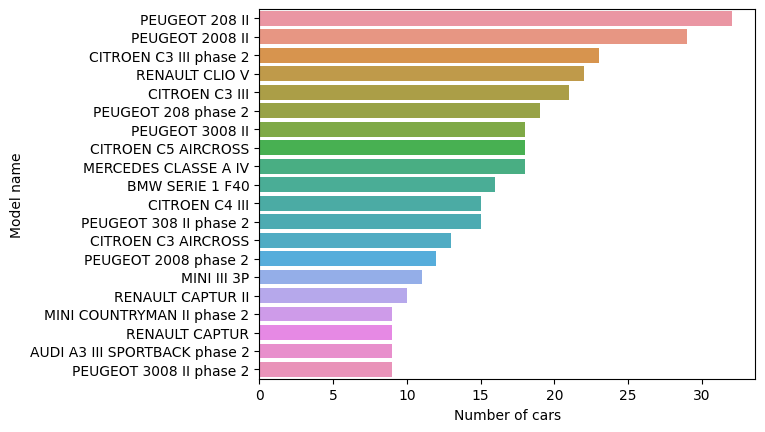

In [15]:
sns.barplot(y='model', x='count', data=car_model)
plt.xlabel('Number of cars')
plt.ylabel('Model name')

On a beaucoup de model mais les nombres devoiture par modeles sont peu élevé
on va donc regarder les 20 marques les plus vendus

In [16]:
marques = car_model.model.str.strip().str.split().str[0].value_counts().reset_index().head(20)
marques

,model,count
0,PEUGEOT,7
1,CITROEN,5
2,RENAULT,3
3,MINI,2
4,MERCEDES,1
5,BMW,1
6,AUDI,1


Text(0, 0.5, 'Model name')

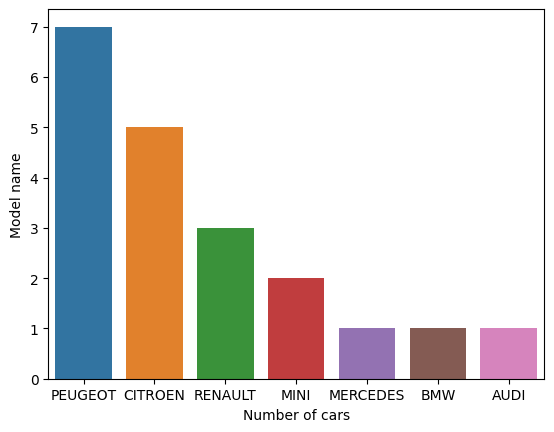

In [17]:
sns.barplot(y='count', x='model', data=marques)
plt.xlabel('Number of cars')
plt.ylabel('Model name')

La c'est plus parlant et on peut dire que les français aiment bien les peugeots.

Maintenant regardant du coté des prix.

In [18]:
lacentral_df.price = lacentral_df.price.str.strip().str.extract(r'([0-9 ]+)')[0].str.replace(' ', '').astype('int')
lacentral_df.price = lacentral_df[lacentral_df.price < 200000]['price']

Text(0, 0.5, 'Frequency')

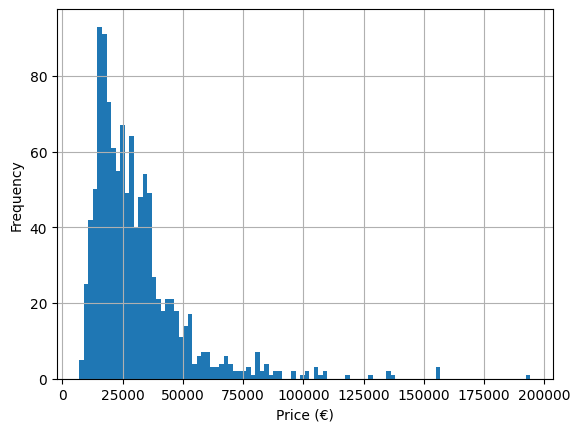

In [19]:
car_price = lacentral_df.price
car_price.hist(bins=100)
plt.xlabel('Price (€)')
plt.ylabel('Frequency')

Regardons la puissance

<Axes: xlabel='horsepower', ylabel='Count'>

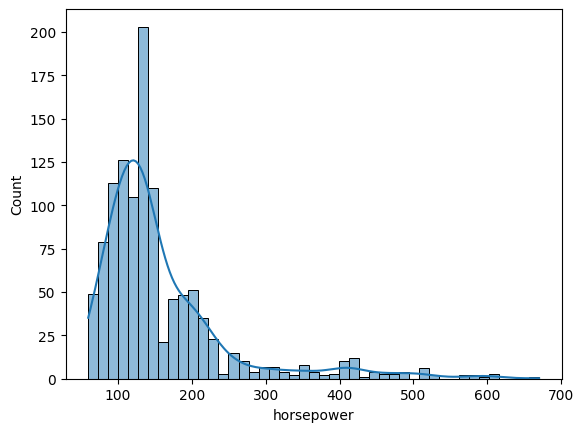

In [20]:
lacentral_df.horsepower = lacentral_df[lacentral_df.horsepower < 700]['horsepower']
sns.histplot(data=lacentral_df, x="horsepower", kde=True)

On peut maintenant regarder par rapport à la date de la mise en circulation

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, '2003'),
  Text(1, 0, '2009'),
  Text(2, 0, '2010'),
  Text(3, 0, '2011'),
  Text(4, 0, '2012'),
  Text(5, 0, '2013'),
  Text(6, 0, '2014'),
  Text(7, 0, '2015'),
  Text(8, 0, '2016'),
  Text(9, 0, '2017'),
  Text(10, 0, '2018'),
  Text(11, 0, '2019'),
  Text(12, 0, '2020'),
  Text(13, 0, '2021'),
  Text(14, 0, '2022'),
  Text(15, 0, '2023'),
  Text(16, 0, '2024')])

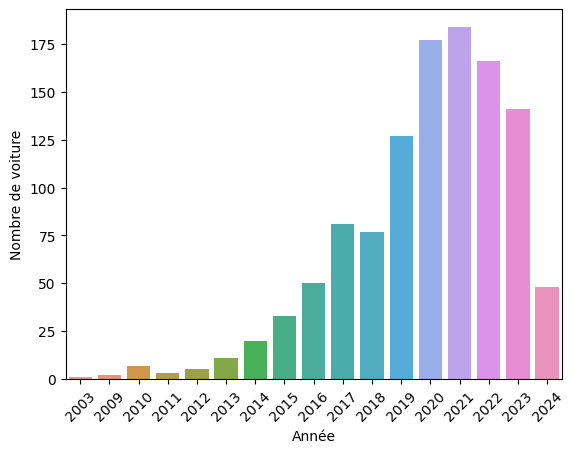

In [21]:
sns.barplot(x='year', y='count', data=lacentral_df['year'].value_counts().reset_index().head(20))
plt.xlabel('Année')
plt.ylabel('Nombre de voiture')
plt.xticks(rotation=45)

In [22]:
lacentral_df.kilometers = lacentral_df.kilometers.str.strip().str.extract(r'([0-9 ]+)')[0].str.replace(' ', '').astype('int')

In [23]:
kilometers = lacentral_df[lacentral_df.kilometers < 350000]['kilometers']

<Axes: xlabel='kilometers', ylabel='Count'>

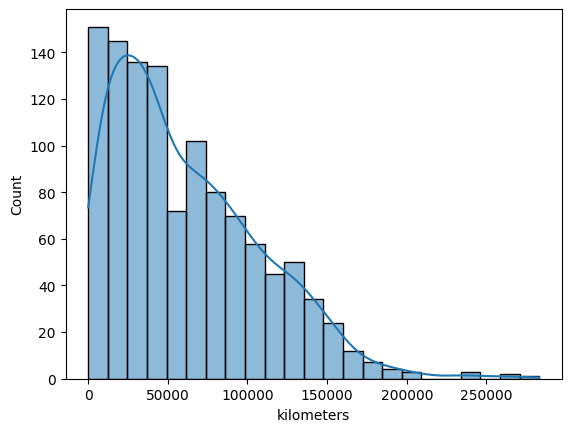

In [24]:
sns.histplot(data=kilometers, kde=True)

Text(0, 0.5, 'Frequency')

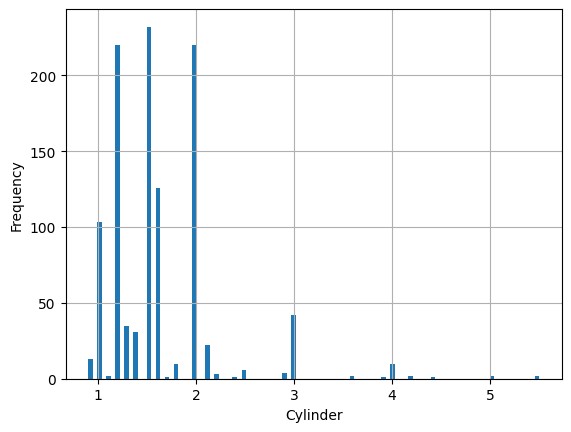

In [25]:
lacentral_df['cylinder'] = lacentral_df[lacentral_df['cylinder'] < 8]['cylinder']
car_cylinder = lacentral_df.cylinder
car_cylinder.hist(bins=100)
plt.xlabel('Cylinder')
plt.ylabel('Frequency')

On peut regarder aussi le type du carburant

In [26]:
energies = lacentral_df['energy'].value_counts().reset_index()
energies

,energy,count
0,Essence,533
1,Diesel,436
2,Hybrides,116
3,Électrique,42
4,Bicarburation essence / gpl,4
5,Bicarburation essence bioéthanol,2


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Essence'),
  Text(1, 0, 'Diesel'),
  Text(2, 0, 'Hybrides'),
  Text(3, 0, 'Électrique'),
  Text(4, 0, 'Bicarburation essence / gpl'),
  Text(5, 0, 'Bicarburation essence bioéthanol')])

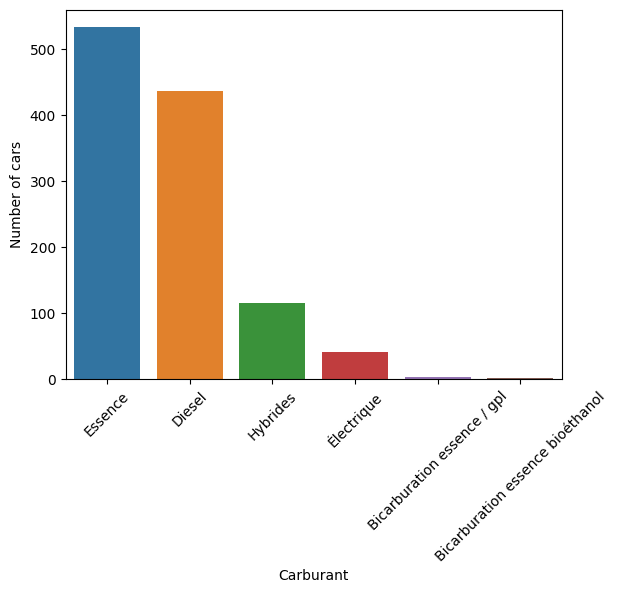

In [27]:
sns.barplot(x='energy', y='count', data=energies)
plt.ylabel('Number of cars')
plt.xlabel('Carburant')
plt.xticks(rotation=45)